# Elastodynamics: implicit solver

Author: A. Chao Correas (arturo.chaocorreas@polito.it)

## Derivation of the weak form of the elastodynamics problem

Let us assume an elastodynamics problem in which a domain $\Omega$ is subjected to:

1. Time-dependent displacement boundary conditions $\underline{U}(t)$ on the Dirichlet boundary $\partial_{u}{\Omega}$.
2. Time-dependent surface loads  $\underline{f}(t)$ (Neumann BCs) along the Neumann boundary $\partial_{f}{\Omega}= \partial{\Omega} \setminus \partial_{u}{\Omega}$.
3. Time-dependent distributed body forces $\underline{b}(t)$ in $\Omega$.

We denote by $\underline{u}(t)$ and $\dot{\underline{u}}(t)$ are the displacement and velocity vector fields at the instant $t$.

To fulfill the Dirichlet boundary conditions, the displacement field $\underline{u}(t)$ must belong to the vector space $\mathrm{V}(t)$, which is defined as:

$$ \mathrm{V}(t) = \left\{ \underline{u}(t) = \underline{U}(t) \quad \forall \underline{x} \in \partial_{u}\Omega \right\} $$


For an elastic body submitted to conservative external loads, the total potential energy of the system $\mathcal{P}$ writes as:

$$ \mathcal{P}\left(\underline{u}(t), t\right)  =
 %\mathcal{P}_{K}\left(\dot{\underline{u}}(t), t\right) +
  \mathcal{E}\left(\underline{u}(t)\right) - \mathcal{W}_{\mathrm{ext}}\left(\underline{u}(t), t\right)
  $$ 
where 
$$
\mathcal{E}\left(\underline{u}(t)\right) = 
\int_{\Omega} \psi \left(\underline{u}(\underline{x},t)\right) \,\mathrm{d}{x},\qquad
\mathcal{W}_{\mathrm{ext}}\left(\underline{u}(t), t\right) = \int_{\Omega} \underline{b}(\underline{x},t) \cdot \underline{u}(t) \,\mathrm{d}{x} + \int_{\partial_{f}\Omega} \underline{f}(\underline{x},t) \cdot \underline{u}(t) \,\mathrm{d}{s}
$$
are the strain energy and the work of the conservative external loads, 
 $\psi$ being the strain energy density. 

 The kinetic energy writes as
 $$\mathcal{K}\left(\dot{\underline{u}}(t)\right) = \frac{1}{2} \int_{\Omega} \rho \dot{\underline{u}}(t) \cdot \dot{\underline{u}}(t) \,\mathrm{d}{x}$$


Using the principle of least action, one can determine the following weak formulation of the elastodynamics: 

$$ \frac{\mathrm{d}}{\mathrm{d}t}\left(\mathrm{D}_{\underline{\dot{u}}}\mathcal{K}\left( \dot{\underline{u}}(t)\right)\left[\hat{\underline{u}} \right]\right) 
+
\mathrm{D}_{\underline{u}} \mathcal{P}\left(\underline{u}(t), \dot{\underline{u}}(t), t\right)\left[\hat{\underline{u}}(t) \right] = -\mathrm{D}_{\underline{\dot{u}}}\mathcal{Q} \left( \dot{\underline{u}}(t), t \right) \left[\hat{\underline{u}} \right]$$ 
where $\mathcal{Q} \left( \dot{\underline{u}}(t), t \right)$ is a Rayleigh dissipation functional that can be used to add  dissipative terms, as viscous forces and $\mathrm{D}_{\underline{u}} \mathcal{P}(\underline u)[\hat{\underline{u}}]$ denotes the directional derivative of the functional $\mathcal{P}(\underline u)$ along the direction $\hat{\underline{u}}$.

In the conservative case $\mathcal{Q}=0$ this gives:

$$
\int_{\Omega}\rho\,\ddot{\underline{u}}(t) \cdot \hat{\underline{u}} \,\mathrm{d}\underline{x} 
+ 
\int_{\Omega} \frac{\partial \psi\left(\underline{u}(t)\right)}{\partial \underline{u}(t)}\cdot \hat{\underline{u}} \,\mathrm{d}\underline{x} 
=

\int_{\Omega} \underline{b}(t)\cdot \hat{\underline{u}}\,\mathrm{d}\underline{x} + \int_{\partial_\Sigma\Omega} {\underline{f}}(t)\cdot \hat{\underline{u}} \,\mathrm{d}\underline{x} \quad \forall \hat{\underline{u}} \in \mathrm{V}_{0}(t)
$$

Where the term $\frac{\partial \psi\left(\underline{u}(t)\right)}{\partial \underline{u}(t)}\left(\underline{u}(t)\right)$ indicates that the derivative of the strain energy density with respect to the displacement field $\underline{u}(t)$ is a function of only the displacement field. Remarkably, the presence of the acceleration $\ddot{\underline{u}}(t)$ in the inertial term makes the system history-dependent and, differently from the quasi-static case, the problem cannot be independently solved at each instant. As a consequence, a time integration scheme is required towards relating the acceleration and displacement fields, so that the governing equation can be entirely written in terms of the former. In what follows, the well-established Newmark $\beta$-method for time integration will be presented and used.



# Newmark $\beta$-method for time integration of dynamic problems
Reference: Newmark N.M., 1959. A Method of Computation for Structural Dynamics. J Eng Mech Div. 85:67–94. https://doi.org/10.1061/JMCEA3.0000098

Let us assume a time discretization of the temporal domain of the problem so that $t_i$ represents the latest instant at which the system's state is known, and $t_{i+1}$ is the earliest instant at which the solution is not known. On this basis, the one can define the time increment $\Delta t_{i}$ as follows:

$$ \Delta t_{i} = t_{i+1}-t_{i}$$

Then, using the extended mean value theorem, the displacement and velocity vector fields at $t_{i+1}$ can be approximated as:

$$ \underline{u}(t_{i+1}) = \underline{u}(t_{i})+\Delta t_{i}\dot{\underline{u}}(t_i)+\frac{{\Delta t_i}^2}{2}\left((1-2\beta)\,\ddot{\underline{u}}(t_{i})+2\beta\, \ddot{\underline{u}}(t_{i+1}) \right) \quad 0\le 2\beta\le1 $$

$$ \dot{\underline{u}}(t_{i+1}) = \dot{\underline{u}}(t_{i})+\Delta t_{i} \left((1-\gamma)\,\ddot{\underline{u}}(t_{i})+\gamma\,\ddot{\underline{u}}(t_{i+1}) \right) \quad 0\le\gamma\le1 $$

where $\beta$ and $\gamma$ are scalar parameters that allow to modify the characteristics of the time stepping scheme by weighting how much the acceleration at the instant $t_{i+1}$, i.e. $\ddot{\underline{u}}(t_{i+1})$, affects $\underline{u}(t_{i+1})$ and $\dot{\underline{u}}(t_{i+1})$. 

Generally speaking, the Newmark $\beta$-method represents an implicit time integration scheme, for it determines the solution at $t_{i+1}$ as a function of the system state at both instants $t_{i}$ and $t_{i+1}$. Only for a specific choice of the parameters $\beta$ and $\gamma$, this method becomes explicit (See below). 

Now, particularizing the weak form of the elastodynamic problem to the instant $t=t_{i+1}$ and substituting $\underline{u}(t_{i+1})$ by its approximation above, an equation with just $\ddot{\underline{u}}(t_{i+1})$ as an unknown is obtained.

$$\int_{\Omega}\rho\,\ddot{\underline{u}}(t_{i+1}) \cdot \delta\underline{u}(t)\,\mathrm{d}\underline{x} + \int_{\Omega} \frac{\partial \psi\left(\underline{u}(t)\right)}{\partial \underline{u}(t)}\left(\ddot{\underline{u}}(t_{i+1});\, \beta, \underline{u}(t_{i}), \dot{\underline{u}}(t_{i}), \ddot{\underline{u}}(t_{i}) \right) \cdot \delta\underline{u}(t) \,\mathrm{d}\underline{x} = 
\int_{\Omega} \underline{b}(t)\cdot \delta\underline{u}(t) \,\mathrm{d}\underline{x} + \int_{\partial_\Sigma\Omega} {\underline{\Sigma}}(t)\cdot \delta\underline{u}(t) \,\mathrm{d}\underline{x} \quad \forall \delta\underline{u}(t) \in \mathcal{V}_{0}(t)$$


## Explicit time integration scheme - Central difference scheme ($\beta = 0$ and $\gamma = 1/2$)

In an explicit integrator, the unknown state of the system at an instant $t_{i+1}$ is entirely determined through the propagation of the known system's state at a previous instant $t_i$, which is the case for the particular choice of $\beta = 0$ and $\gamma = 1/2$ in the Newmark's $\beta$-method. Clearly, this choice implies that :

* $\ddot{\underline{u}}(t_{i+1})$ will not play any role in the determination of $\underline{u}(t_{i+1})$

* $\ddot{\underline{u}}(t_{i})$ and $\ddot{\underline{u}}(t_{i+1})$ have the same importance in the determination of $\dot{\underline{u}}(t_{i+1})$

Subsequently, the propagation of the displacement and velocity vector fields to the instant $t_{i+1}$ particularizes as follows:

$$ \underline{u}(t_{i+1}) = \underline{u}(t_{i})+\Delta t_{i}\,\dot{\underline{u}}(t_i)+\frac{{\Delta t_{i}}^2}{2}\,\ddot{\underline{u}}(t_{i}) $$

$$ \dot{\underline{u}}(t_{i+1}) = \dot{\underline{u}}(t_{i})+\frac{\Delta t_{i}}{2} \left(\ddot{\underline{u}}(t_{i})+\ddot{\underline{u}}(t_{i+1}) \right) $$

As a consequence, the displacement field $\underline{u}(t_{i+1})$ can be entirely determined on the basis of the last known system's state, i.e. $\underline{u}(t_{i})$, $\dot{\underline{u}}(t_i)$ and $\ddot{\underline{u}}(t_{i})$. On the other hand, the velocity field can only be updated once the acceleration $\ddot{\underline{u}}(t_{i+1})$ is known. Nonetheless, particularizing the the weak form of the elastodynamics problem for the instant $t_{i+1}$:

$$\int_{\Omega}\rho\,\ddot{\underline{u}}(t_{i+1}) \cdot \hat{\underline{u}}\,\mathrm{d}\underline{x} 
= 
- 
\int_{\Omega} \frac{\partial \psi\left(\underline{u}(t)\right)}{\partial \underline{u}(t)}
\left(\underline{u}(t_{i}), \dot{\underline{u}}(t_{i}), \ddot{\underline{u}}(t_{i})\right) 
\cdot 
\hat{\underline{u}}\,\mathrm{d}\underline{x} 
+ 
\int_{\Omega} \underline{b}(t_{i+1})\cdot \hat{\underline{u}} \,\mathrm{d}\underline{x} + \int_{\partial_t\Omega} \underline{f}(t_{i+1})\cdot \hat{\underline{u}} \,\mathrm{d}\underline{s} \quad \forall \hat{\underline{u}}\in \mathcal{V}_{0}$$

in which the right hand side is completely known once the displacement field is propagated to $t_{i+1}$. Therefore, the equation above allows to determine the acceleration $\ddot{\underline{u}}(t_{i+1})$ required for the estimation of $\dot{\underline{u}}(t_{i+1})$, and so the elastodynamics problem is solved.

# Numerical implementation in dolfinx

Import required libraries

In [1]:
import dolfinx, ufl
import numpy as np
import sympy as sp
from mpi4py import MPI
from petsc4py import PETSc
from matplotlib import pyplot as plt
import sys
sys.path.append("../utils/")

import mesh_plotter
from petsc_problems import SNESProblem

Input parameters

In [2]:
# Characteristic dimensions of the domain
geometry_parameters = {'Lx': 1., 
                       'Ly': 0.1}

# Regularization length               
material_properties = {'E':   3e3, 
                       'nu':  0.3, 
                       'rho': 1.8e-9}

# Mesh control
mesh_parameters = {'nx': 10,
                   'ny': 1}

# Time stepping control
timestepping_parameters = {'initial_time':0., 
                           'total_time':20e-6, 
                           'delta_t':1.e-8,
                           'explicit_safety_factor': 5}

# Time integration control (\beta-method)
timeintegration_parameters = {'beta': 0.25,
                              'gamma': 0.5}

# Top facet displacement
T_0 = 0.
T_1 = 2.5e-6
U_t = 1e-2

t_sp = sp.Symbol('t', real = True)
U_imp = sp.Piecewise((0, t_sp<T_0),
                     (0.5*U_t*(1-sp.cos(((t_sp-T_0)/(T_1-T_0))*sp.pi)), t_sp<=T_1),
                     (U_t, True)) 
V_imp = sp.diff(U_imp, t_sp)
A_imp = sp.diff(V_imp, t_sp)

# Body forces
Xi = np.asarray([0.,0.])

Loading on the right

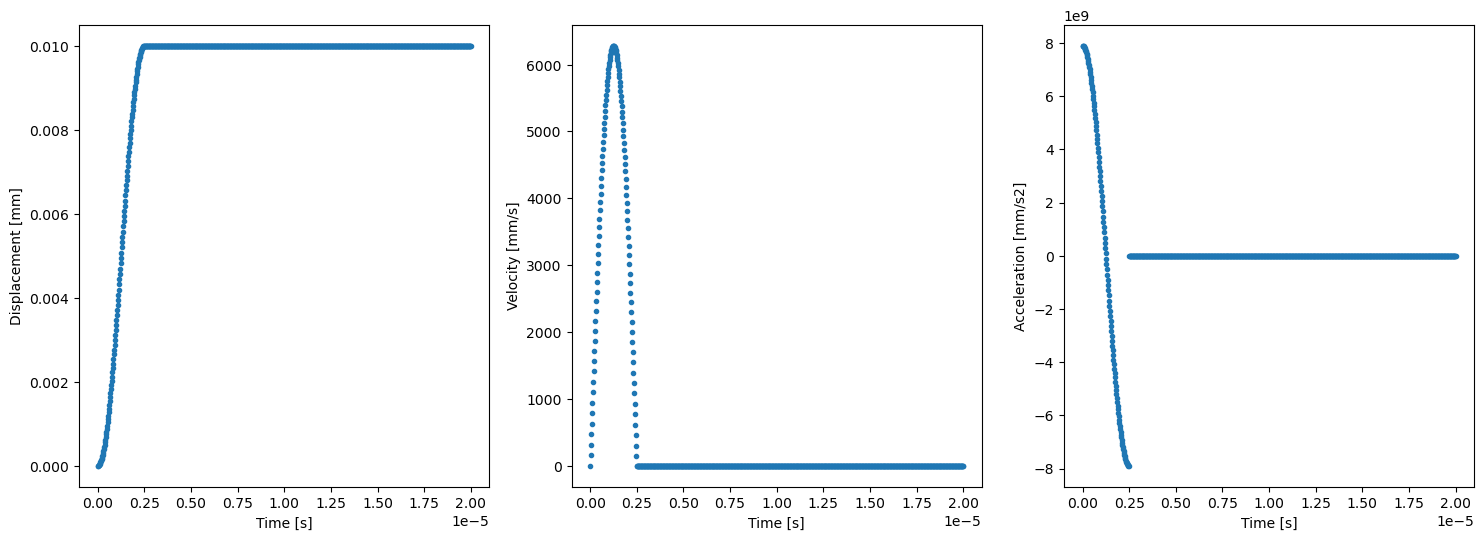

In [3]:
t_sampling = np.linspace(timestepping_parameters['initial_time'], 
                         timestepping_parameters['total_time'], 
                         1000) 
U_imp_sampling = np.zeros_like(t_sampling)
V_imp_sampling = np.zeros_like(t_sampling)
A_imp_sampling = np.zeros_like(t_sampling)

for i in enumerate (t_sampling):
    U_imp_sampling[i[0]] = U_imp.subs({t_sp:t_sampling[i[0]]})
    V_imp_sampling[i[0]] = V_imp.subs({t_sp:t_sampling[i[0]]})
    A_imp_sampling[i[0]] = A_imp.subs({t_sp:t_sampling[i[0]]})
    
fig, ax = plt.subplots(1, 3, figsize=(18,6))
ax[0].plot(t_sampling, U_imp_sampling, ls='none', marker='.')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Displacement [mm]')
ax[1].plot(t_sampling, V_imp_sampling, ls='none', marker='.')
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Velocity [mm/s]')
ax[2].plot(t_sampling, A_imp_sampling, ls='none', marker='.')
ax[2].set_xlabel('Time [s]')
ax[2].set_ylabel('Acceleration [mm/s2]');

Mesh, geometrical regions of interest and measures

In [4]:
mesh = dolfinx.mesh.create_rectangle(MPI.COMM_WORLD, 
                                     [np.array([-geometry_parameters['Lx']/2, -geometry_parameters['Ly']/2]), 
                                      np.array([+geometry_parameters['Lx']/2, +geometry_parameters['Ly']/2])], 
                                     [mesh_parameters['nx'], mesh_parameters['ny']], 
                                     dolfinx.mesh.CellType.triangle)
#mesh_plotter(mesh)

In [5]:
# Geometrical regions  
def top(x):
    return np.isclose(x[1], +geometry_parameters["Ly"]/2)
def bottom(x):
    return np.isclose(x[1], -geometry_parameters["Ly"]/2)
def right (x):
    return np.isclose(x[0], +geometry_parameters["Lx"]/2)
def left (x):
    return np.isclose(x[0], -geometry_parameters["Lx"]/2)

# Geometrical sets
top_facets = dolfinx.mesh.locate_entities_boundary(mesh, mesh.topology.dim-1, top)
bottom_facets = dolfinx.mesh.locate_entities_boundary(mesh, mesh.topology.dim-1, bottom)
right_facets = dolfinx.mesh.locate_entities(mesh, mesh.topology.dim-1, right)
left_facets = dolfinx.mesh.locate_entities(mesh, mesh.topology.dim-1, left)

tagged_facets = np.hstack([top_facets, bottom_facets, right_facets, left_facets])
tag_values = np.hstack([np.full_like(top_facets, 1), 
                        np.full_like(bottom_facets, 2),
                        np.full_like(right_facets, 3),
                        np.full_like(left_facets, 4)])
tagged_facets_sorted = np.argsort(tagged_facets)
mt = dolfinx.mesh.meshtags(mesh, mesh.topology.dim-1, 
                           tagged_facets[tagged_facets_sorted], 
                           tag_values[tagged_facets_sorted])

# Domain and subdomain measures
dx  = ufl.Measure("dx", domain=mesh)                         # Domain measure
ds  = ufl.Measure("ds", domain=mesh, subdomain_data=mt)      # External Boundary measure
dS  = ufl.Measure("dS", domain=mesh, subdomain_data=mt)      # External/Internal measure
n   = ufl.FacetNormal(mesh)                                  # External normal to the boundary

Function spaces, functions and system's state

In [6]:
# --------- Main functions and function spaces
element_u = ufl.VectorElement('CG', mesh.ufl_cell(), degree=1, dim=mesh.topology.dim)
V_u = dolfinx.fem.FunctionSpace(mesh, element_u)
u = dolfinx.fem.Function(V_u, name="Displacement")
u_new = dolfinx.fem.Function(V_u)
v = dolfinx.fem.Function(V_u, name="Velocity")
v_new = dolfinx.fem.Function(V_u)
a = dolfinx.fem.Function(V_u, name="Acceleration")
a_new = dolfinx.fem.Function(V_u)

# --------- Auxiliar functions
ones_a = dolfinx.fem.Function(V_u)

# --------- State of each field 
state = {"u": u,"v": v,"a": a}

Boundary conditions

In [7]:
# --------- Displacement problem -----------------------------------------------------
# Definition of the values for the blocked displacement DoFs
V_ux = V_u.sub(0)
V_uy = V_u.sub(1)

# Clamped left (ux=uy=0) 
zero_u = dolfinx.fem.Function(V_u)
blocked_dofs_left_u = dolfinx.fem.locate_dofs_geometrical(V_u, left)
bc_u_left = dolfinx.fem.dirichletbc(zero_u, blocked_dofs_left_u)

# Imposed displacement right (ux=U_imp(t))
right_ux = dolfinx.fem.Function(V_ux.collapse()[0])
blocked_dofs_top_ux = dolfinx.fem.locate_dofs_geometrical((V_ux, V_ux.collapse()[0]), right)
bc_ux_right = dolfinx.fem.dirichletbc(right_ux, blocked_dofs_top_ux, V_ux)

# Concatenate u-BCs
bcs_u = [bc_u_left, bc_ux_right]

# --------- Velocity problem -----------------------------------------------------
zero_v = dolfinx.fem.Function(V_u)
bc_v_left = dolfinx.fem.dirichletbc(zero_v, blocked_dofs_left_u)

right_vx = dolfinx.fem.Function(V_ux.collapse()[0])
bc_ux_right = dolfinx.fem.dirichletbc(right_vx, blocked_dofs_top_ux, V_ux)

bcs_v = [bc_v_left, bc_ux_right]

# --------- Acceleration problem -----------------------------------------------------
zero_a = dolfinx.fem.Function(V_u)
bc_a_left = dolfinx.fem.dirichletbc(zero_a, blocked_dofs_left_u)

right_ax = dolfinx.fem.Function(V_ux.collapse()[0])
bc_ax_right = dolfinx.fem.dirichletbc(right_ax, blocked_dofs_top_ux, V_ux)

bcs_a = [bc_a_left, bc_ax_right]


Variational magnitudes

In [8]:
t = dolfinx.fem.Constant(mesh, 0.)

# Material properties
E   = dolfinx.fem.Constant(mesh, material_properties["E"])
nu  = dolfinx.fem.Constant(mesh, material_properties["nu"])
rho = dolfinx.fem.Constant(mesh, material_properties["rho"])

# Body forces
b = dolfinx.fem.Constant(mesh, Xi)

# Lame constants (Plane strain)
mu    = E / (2.0 * (1.0 + nu))
lmbda = E * nu / ((1.0 + nu) * (1.0 - 2.0 * nu))

## Infinitesimal strain tensor
eps = ufl.variable(ufl.sym(ufl.grad(u)))

## Kinetic energy density
kinetic_energy_density = 0.5 * rho * ufl.inner(v,v)

## Strain energy density (Linear elastic)
elastic_energy_density = lmbda / 2 * ufl.tr(eps) ** 2 + mu * ufl.inner(eps,eps)

# Stress tensor
sigma = ufl.diff(elastic_energy_density, eps)

# System's energies and Lagrangian
elastic_energy = elastic_energy_density * dx 
external_work = ufl.dot(b,u) * dx 
potential_energy = elastic_energy - external_work
kinetic_energy = kinetic_energy_density * dx
lagrangian = kinetic_energy - potential_energy
total_energy = kinetic_energy + potential_energy

# Lagrangian derivatives
u_test = ufl.TestFunction(V_u)
P_du = ufl.derivative(potential_energy, u, u_test) 
K_dv = ufl.derivative(kinetic_energy, v, u_test)

# Residual 
Res = K_dv + P_du

## Iterative resolution

In [9]:
delta_t_0 = timestepping_parameters['delta_t']
total_time =timestepping_parameters["total_time"]
beta = timeintegration_parameters['beta']
gamma = timeintegration_parameters['gamma']

# Time increment
def delta_t(t):
    return float(ufl.conditional(ufl.lt(delta_t_0,total_time-t), 
                                delta_t_0,
                                total_time - t)
                 )

# Approximation of u
def u_apr (t, u, v, a, a_new):
    return (u + delta_t(t) * v + 
            0.5 * delta_t(t) ** 2 * ((1 - 2 * beta) * a + 2 * beta * a_new))

# Approximation of v
def v_apr (t, v, a, a_new):
    return (v + delta_t(t) * ((1 - gamma) * a + gamma * a_new))


Acceleration solver

In [10]:
## --------- Acceleration explicit problem ----------------------------------------------------
Res_beta = ufl.replace(Res, {v: a_new, u: u_apr (t, u, v, a, a_new)})
Res_beta_da = ufl.derivative(Res_beta, a_new, ufl.TrialFunction(V_u)) 

a_problem = SNESProblem(Res_beta, a_new, bcs_a, J=Res_beta_da)
b_vector = dolfinx.la.create_petsc_vector(V_u.dofmap.index_map, V_u.dofmap.index_map_bs)
J_matrix = dolfinx.fem.petsc.create_matrix(dolfinx.fem.form(a_problem.a))

# Acceleration Solver (with consistent mass matrix)
solver_a_snes = PETSc.SNES().create()
solver_a_snes.setType("ksponly")
solver_a_snes.setFunction(a_problem.F, b_vector)
solver_a_snes.setJacobian(a_problem.J, J_matrix)
solver_a_snes.setTolerances(rtol=1.0e-9, max_it=15)
solver_a_snes.getKSP().setType("preonly")
solver_a_snes.getKSP().setTolerances(rtol=1.0e-9)
solver_a_snes.getKSP().getPC().setType("lu")

Magnitudes of interest

In [11]:
kinetic_energy_form = dolfinx.fem.form(kinetic_energy)
elastic_energy_form = dolfinx.fem.form(elastic_energy)
potential_energy_form = dolfinx.fem.form(potential_energy)
total_energy_form = dolfinx.fem.form(potential_energy + kinetic_energy)
Fx_react_right_form = dolfinx.fem.form(ufl.inner(n,sigma*n)*ds(3))

Iterative resolution

In [12]:
# Initialization
t.value = timestepping_parameters["initial_time"]

kinetic_energies = []
elastic_energies = []
external_works = []
potential_energies =[]
Fx_react_right_s = []
ts = []

ones_a.x.array[:] = 1.
for func in [u,v,a,zero_u,zero_v,zero_a] :
    func.x.array[:] = 0.

xdmf = dolfinx.io.XDMFFile(mesh.comm, "implicit_dynamics.xdmf", "w")
xdmf.write_mesh(mesh)
xdmf.write_function(u, t.value)
## ------------- TIME STEPPING

while t.value < total_time :
    
    # Update displacement boundary conditions      
    right_ux.x.array[:] = float(U_imp.subs({t_sp:t.value}))
    right_vx.x.array[:] = float(V_imp.subs({t_sp:t.value}))
    right_ax.x.array[:] = float(A_imp.subs({t_sp:t.value}))

    # Update acceleration
    solver_a_snes.solve(None, a_new.vector)
    a_new.vector.ghostUpdate(addv=PETSc.InsertMode.INSERT, mode=PETSc.ScatterMode.FORWARD)
    
    # Update displacement field    
    (u_apr(t.value, u.vector, v.vector, a.vector, a_new.vector)).copy(u_new.vector)
    u_new.vector.ghostUpdate(addv=PETSc.InsertMode.INSERT, mode=PETSc.ScatterMode.FORWARD)
    dolfinx.fem.set_bc(u_new.vector,bcs_u)
    u_new.vector.ghostUpdate(addv=PETSc.InsertMode.INSERT, mode=PETSc.ScatterMode.FORWARD)
    
    # Update velocity
    (v_apr (t.value, v.vector, a.vector, a_new.vector)).copy(v_new.vector)
    v_new.vector.ghostUpdate(addv=PETSc.InsertMode.INSERT, mode=PETSc.ScatterMode.FORWARD)
    dolfinx.fem.set_bc(v_new.vector,bcs_v)
    v_new.vector.ghostUpdate(addv=PETSc.InsertMode.INSERT, mode=PETSc.ScatterMode.FORWARD)

    # Copy i+1 into i
    u.x.array[:] = u_new.x.array
    v.x.array[:] = v_new.x.array
    a.x.array[:] = a_new.x.array
    
    t.value += delta_t(t.value)
    
    kinetic_energies = np.concatenate((kinetic_energies,
                            [MPI.COMM_WORLD.allreduce(dolfinx.fem.assemble_scalar(kinetic_energy_form), op=MPI.SUM)]))
    
    elastic_energies = np.concatenate((elastic_energies,
                            [MPI.COMM_WORLD.allreduce(dolfinx.fem.assemble_scalar(elastic_energy_form), op=MPI.SUM)]))
    
    potential_energies = np.concatenate((elastic_energies,
                            [MPI.COMM_WORLD.allreduce(dolfinx.fem.assemble_scalar(potential_energy_form), op=MPI.SUM)]))
    
    Fx_react_right_s = np.concatenate((Fx_react_right_s,
                            [MPI.COMM_WORLD.allreduce(dolfinx.fem.assemble_scalar(Fx_react_right_form), op=MPI.SUM)]))
    
    ts = np.concatenate((ts,[t.value]))
    
    # save displacement
    xdmf.write_function(u, t.value)

Text(0, 0.5, 'Reaction force [N]')

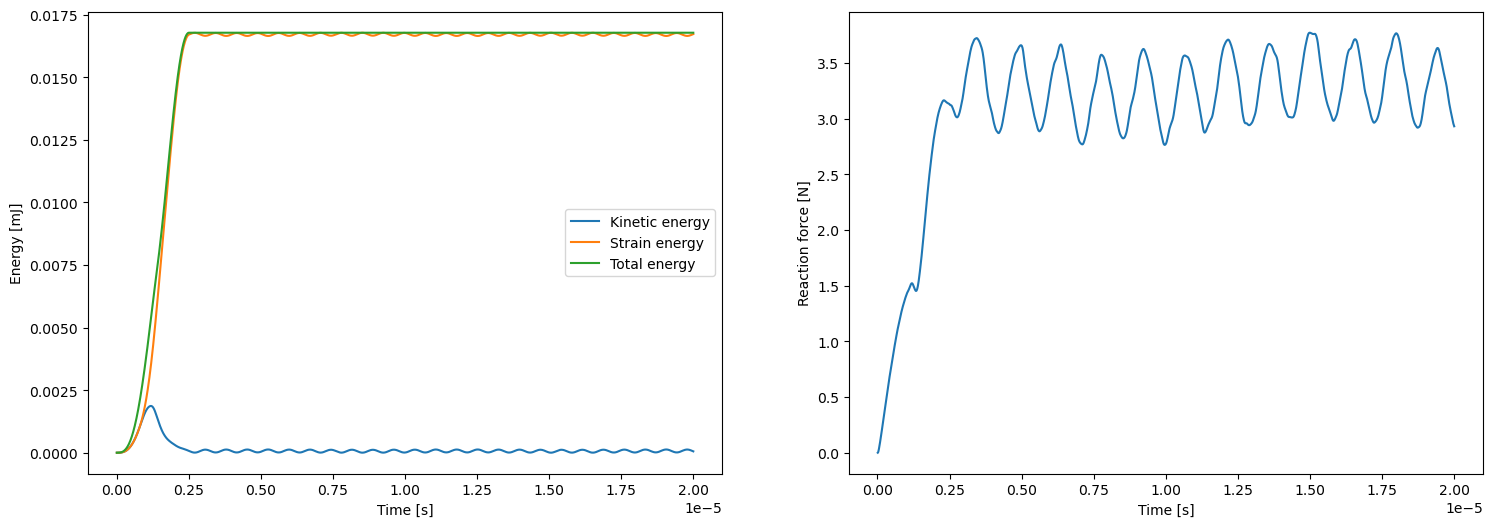

In [14]:
fig2, ax2 = plt.subplots(1, 2, figsize=(18,6))

ax2[0].plot (ts, kinetic_energies, label = 'Kinetic energy')
ax2[0].plot (ts, elastic_energies, label = 'Strain energy')
ax2[0].plot (ts, kinetic_energies + elastic_energies, label = 'Total energy')
ax2[0].set_xlabel('Time [s]')
ax2[0].set_ylabel('Energy [mJ]')
ax2[0].legend()

ax2[1].plot (ts, Fx_react_right_s)
ax2[1].set_xlabel('Time [s]')
ax2[1].set_ylabel('Reaction force [N]')